## Python Implementation

### Business Case:-To find out based on given features whether the loan will get approved or not

In [ ]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [ ]:
## Getting the first few rows of data
data.head()

In [ ]:
# Domian analysis.

## Basic Checks

In [ ]:
#Gives statistical inforamtion about numerical columns
data.describe()

***Observation***
-

In [ ]:
data.describe(include='O')

In [ ]:
data.info()

In [ ]:
data.shape

## Exploratory Data Analysis

In [ ]:
# Univariate analysis
# Bivaraite analysis--Autoviz

In [ ]:
data.head()

In [ ]:
#!pip install sweetviz

In [ ]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [ ]:
## Bivariate Analysis
data.info()

In [ ]:
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']] #Categorical data
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']] #Numerical Data

In [ ]:
plt.figure(figsize=(20,10))#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the columns
    plt.subplot(2,3,plotnumber)
    sns.countplot(x=data1[column],hue=data['Loan_Status (Approved)'])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

In [ ]:
data1["Gender"]

In [ ]:
plt.figure(figsize=(20,25))#To set canvas
plotnumber = 1#counter

for column in data2:#accessing the columns
    ax = plt.subplot(4,4,plotnumber)
    sns.histplot(x=data2[column])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

## Data Preprocessing Pipeline

In [ ]:
## Checking missing values
data.isnull().sum()

In [ ]:
data.shape

In [ ]:
## Getting the rows where values are missed in Gender features
data.loc[data["Gender"].isnull()]

In [ ]:
## How much values have been missed
data.Gender.isnull().sum()/len(data)*100
#There are around 2.11% of data is null in Gender Column

In [ ]:
## Checking the distribution along the both labels
data.Gender.value_counts()

In [ ]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull(),"Gender"] = "Male"

In [ ]:
data.Gender.isnull().sum()

In [ ]:
## Getting the values in Dependents
data.loc[data["Dependents"].isnull()]

In [ ]:
data.Dependents.value_counts()

In [ ]:
# From the graphical representation it can be seen that as the number of dependents
#getting increased,
# the chances of approval is less, since we have missed values and if we approve
# loan for them
# it can turn into major loss(high chance).Hence we will substitue missing values
#by 3+.
data.loc[data['Dependents'].isnull(),'Dependents'] = '3+'

In [ ]:
data["Dependents"].isnull().sum()

In [ ]:
data.head()

In [ ]:
## renaming the target column
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
## For married feature
data.loc[data['Married'].isnull()]

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

In [ ]:
## getting the counts
data.Married.value_counts()

In [ ]:
## Imputing with yes i.e mode
data.loc[data['Married'].isnull(),'Married']='Yes'

In [ ]:
## Checking Self_Employed
#data.loc[data['Self_Employed'].isnull()==True]
data.loc[data['Self_Employed'].isnull()]

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

In [ ]:
data.Self_Employed.value_counts()

In [ ]:
# Replace the nan values with mode
data.loc[data['Self_Employed'].isnull(),'Self_Employed']='No'

In [ ]:
# check for null values
data.isnull().sum()

In [ ]:
## Histogram since it has numerical value
sns.histplot(x="LoanAmount",data=data)

Since data is skewed, we can use median to replace the nan value. It is recommended to use mean only for symmetric data distribution.

In [ ]:
# Check median for LoanAmount column
np.median(data.LoanAmount.dropna(axis=0))

In [ ]:
# Replace the nan values in LoanAmount column with median value
data.loc[data['LoanAmount'].isnull(),'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [ ]:
data.LoanAmount.isnull().sum()

In [ ]:
data.isnull().sum()

In [ ]:
## Laon amount term

In [ ]:
data.Loan_Amount_Term.value_counts()

In [ ]:
sns.kdeplot(data["Loan_Amount_Term"])

In [ ]:
# replace the nan values in Loan_Amount_Term with the median value
data.loc[data['Loan_Amount_Term'].isnull(),'Loan_Amount_Term']=360.0

In [ ]:
# Credit_History
data.Credit_History.value_counts()

In [ ]:
sns.countplot(x='Credit_History',data=data,hue='Loan_Status')

In [ ]:
data.loc[data['Credit_History'].isnull(),'Credit_History']=0.0

In [ ]:
data.isnull().sum()

In [ ]:
## Step 2 Handling the categorical data
data.info()

In [ ]:
data.head()

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
pd.get_dummies(data['Gender'],prefix='Gender',dtype=int)

In [ ]:
## One hot encoding
df1=pd.get_dummies(data['Gender'],prefix='Gender')
data=pd.concat([data,df1],axis=1).drop(['Gender'],axis=1)

In [ ]:
df1

In [ ]:
data.head()

In [ ]:
df1=pd.get_dummies(data['Married'],prefix='Married')
data=pd.concat([data,df1],axis=1).drop(['Married'],axis=1)

In [ ]:
data.head()

In [ ]:
data["Education"].unique()

In [ ]:
df1=pd.get_dummies(data['Education'],prefix='Education')
data=pd.concat([data,df1],axis=1).drop(['Education'],axis=1)

In [ ]:
data["Property_Area"].unique()

In [ ]:
df1=pd.get_dummies(data['Property_Area'],prefix='Property_Area',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Property_Area'],axis=1)

In [ ]:
data.head()

In [ ]:
data["Dependents"].unique()

In [ ]:
df1=pd.get_dummies(data['Dependents'],prefix='Dependents',drop_first=True)
data=pd.concat([data,df1],axis=1).drop(['Dependents'],axis=1)

In [ ]:
data["Self_Employed"].unique()

In [ ]:
df1=pd.get_dummies(data['Self_Employed'],prefix='Self_Employed')
data=pd.concat([data,df1],axis=1).drop(['Self_Employed'],axis=1)

In [ ]:
## scaling data
data.head()

In [ ]:
data["Loan_Amount_Term"].value_counts()

In [ ]:
## scaling data
data["Loan_Amount_Term"] = data["Loan_Amount_Term"]/12

In [ ]:
data["Loan_Amount_Term"].value_counts()

In [ ]:
## scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler() #Object Creation
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]=scale.fit_transform(data[['ApplicantIncome','CoapplicantIncome',
                          'LoanAmount']])

In [ ]:
data.head()

In [ ]:
## checking the duplicate rows
#data.duplicate()
data.duplicated().sum()

In [ ]:
## Saving the preprocessed data.
data.to_csv('Preprocessed_data.csv',index=False)

In [ ]:
## Loading the data
preprocessed_data=pd.read_csv('Preprocessed_data.csv')

In [ ]:
preprocessed_data.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,LP001002,0.070489,0.000000,0.172214,30.0,1.0,Y,0,1,1,0,1,0,0,1,0,0,0,1,0
1,LP001003,0.054830,0.036192,0.172214,30.0,1.0,N,0,1,0,1,1,0,0,0,1,0,0,1,0
2,LP001005,0.035250,0.000000,0.082489,30.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,0,0,1
3,LP001006,0.030093,0.056592,0.160637,30.0,1.0,Y,0,1,0,1,0,1,0,1,0,0,0,1,0
4,LP001008,0.072356,0.000000,0.191027,30.0,1.0,Y,0,1,1,0,1,0,0,1,0,0,0,1,0


## Feature Selection

In [ ]:
# Removing redundant columns
#We can drop loan id.
preprocessed_data.drop('Loan_ID',axis=1,inplace=True)

In [ ]:
preprocessed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes
0,0.070489,0.000000,0.172214,30.0,1.0,Y,0,1,1,0,1,0,0,1,0,0,0,1,0
1,0.054830,0.036192,0.172214,30.0,1.0,N,0,1,0,1,1,0,0,0,1,0,0,1,0
2,0.035250,0.000000,0.082489,30.0,1.0,Y,0,1,0,1,1,0,0,1,0,0,0,0,1
3,0.030093,0.056592,0.160637,30.0,1.0,Y,0,1,0,1,0,1,0,1,0,0,0,1,0
4,0.072356,0.000000,0.191027,30.0,1.0,Y,0,1,1,0,1,0,0,1,0,0,0,1,0


C:\Users\AKCLAP-19\AppData\Local\Temp\ipykernel_1736\1861196507.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(preprocessed_data.corr(),annot=True,annot_kws={"size": 7})


<Axes: >

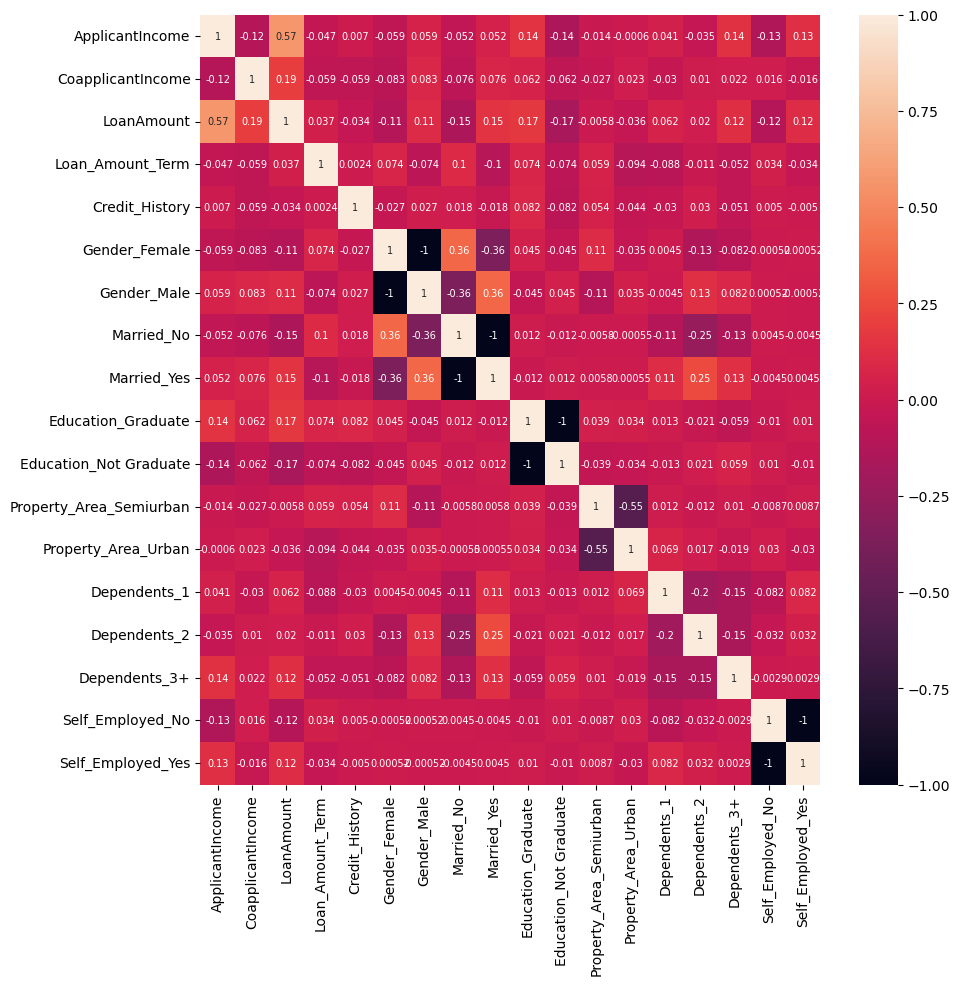

In [ ]:
## checking correlation
plt.figure(figsize=(10,10))
sns.heatmap(preprocessed_data.corr(),annot=True,annot_kws={"size": 7})

In [ ]:
preprocessed_data.drop(["Gender_Male","Married_Yes","Education_Graduate","Self_Employed_Yes"],axis=1,inplace=True)

In [ ]:
preprocessed_data.describe() ## no constant features

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Married_No,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,28.534202,0.773616,0.182410,0.346906,0.218241,0.379479,0.328990,0.166124,0.164495,0.107492,0.866450
std,0.075560,0.070229,0.121718,5.369052,0.418832,0.386497,0.476373,0.413389,0.485653,0.470229,0.372495,0.371027,0.309990,0.340446
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.045300,0.028524,0.172214,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.069821,0.055134,0.225398,30.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
preprocessed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No
0,0.070489,0.000000,0.172214,30.0,1.0,Y,0,1,0,0,1,0,0,0,1
1,0.054830,0.036192,0.172214,30.0,1.0,N,0,0,0,0,0,1,0,0,1
2,0.035250,0.000000,0.082489,30.0,1.0,Y,0,0,0,0,1,0,0,0,0
3,0.030093,0.056592,0.160637,30.0,1.0,Y,0,0,1,0,1,0,0,0,1
4,0.072356,0.000000,0.191027,30.0,1.0,Y,0,1,0,0,1,0,0,0,1


## Model Creation

In [ ]:
preprocessed_data.Loan_Status=preprocessed_data.Loan_Status.map({'Y':1,'N':0})
#Task: What is the difference between map and Replace Function

In [ ]:
preprocessed_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Married_No,Education_Not Graduate,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No
0,0.070489,0.000000,0.172214,30.0,1.0,1,0,1,0,0,1,0,0,0,1
1,0.054830,0.036192,0.172214,30.0,1.0,0,0,0,0,0,0,1,0,0,1
2,0.035250,0.000000,0.082489,30.0,1.0,1,0,0,0,0,1,0,0,0,0
3,0.030093,0.056592,0.160637,30.0,1.0,1,0,0,1,0,1,0,0,0,1
4,0.072356,0.000000,0.191027,30.0,1.0,1,0,1,0,0,1,0,0,0,1


In [ ]:
## defining X and y
X=preprocessed_data.iloc[:,:].drop("Loan_Status",axis=1)
y=preprocessed_data.Loan_Status

In [ ]:
## creating training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42)

In [ ]:
y_train.value_counts()

1    322
0    138
Name: Loan_Status, dtype: int64

In [ ]:
# Install imblearn package -
#!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [ ]:
y_smote.value_counts()

1    322
0    322
Name: Loan_Status, dtype: int64

**Counter** is a container which keeps track to how many times equivalent values are added. Python counter class is a part of collections module and is a subclass of dictionary.

In [ ]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 322, 0: 138})
SMOTE Classes Counter({1: 322, 0: 322})


In [ ]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote) #Training

SVC()

In [ ]:
# Predict output for X_test
y_hat=svclassifier.predict(X_test)

In [ ]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,y_hat) # Actual and Prediction
acc

0.6363636363636364

In [ ]:
# Calssification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report

print(classification_report(y_test,y_hat))#Actual and Prediction

              precision    recall  f1-score   support

           0       0.33      0.04      0.07        54
           1       0.65      0.96      0.77       100

    accuracy                           0.64       154
   macro avg       0.49      0.50      0.42       154
weighted avg       0.54      0.64      0.53       154



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,X,y,cv=10,scoring='accuracy',verbose = 3,n_jobs=-1)
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    8.4s remaining:    3.5s


[0.69354839 0.69354839 0.67741935 0.67741935 0.68852459 0.68852459
 0.68852459 0.68852459 0.68852459 0.68852459]
Cross validation Score: 0.6873083024854575
Std : 0.005313530063281029


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.6s finished


In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [1, 5, 10,30,60,70,100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
             }
model=SVC()
grid = GridSearchCV(model, param_grid,verbose = 3,scoring='f1',cv=3)

In [ ]:
# fitting the model for grid search
grid.fit(X,y)

Fitting 3 folds for each of 35 candidates, totalling 105 fits
[CV 1/3] END ......................C=1, gamma=1;, score=0.853 total time=   0.0s
[CV 2/3] END ......................C=1, gamma=1;, score=0.836 total time=   0.0s
[CV 3/3] END ......................C=1, gamma=1;, score=0.840 total time=   0.0s
[CV 1/3] END ....................C=1, gamma=0.1;, score=0.846 total time=   0.0s
[CV 2/3] END ....................C=1, gamma=0.1;, score=0.817 total time=   0.0s
[CV 3/3] END ....................C=1, gamma=0.1;, score=0.842 total time=   0.0s
[CV 1/3] END ...................C=1, gamma=0.01;, score=0.815 total time=   0.0s
[CV 2/3] END ...................C=1, gamma=0.01;, score=0.815 total time=   0.0s
[CV 3/3] END ...................C=1, gamma=0.01;, score=0.809 total time=   0.0s
[CV 1/3] END ..................C=1, gamma=0.001;, score=0.815 total time=   0.0s
[CV 2/3] END ..................C=1, gamma=0.001;, score=0.815 total time=   0.0s
[CV 3/3] END ..................C=1, gamma=0.001

[CV 1/3] END ...............C=100, gamma=0.0001;, score=0.815 total time=   0.0s
[CV 2/3] END ...............C=100, gamma=0.0001;, score=0.815 total time=   0.0s
[CV 3/3] END ...............C=100, gamma=0.0001;, score=0.814 total time=   0.0s


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 30, 60, 70, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [ ]:
# print best parameter after tuning
print("Best Parameters of C & Gamma are:",grid.best_params_)

# print how our model looks after hyper-parameter tuning
print("Best Score we can get is:",grid.best_score_)

Best Parameters of C & Gamma are: {'C': 30, 'gamma': 0.01}
Best Score we can get is: 0.8461903688678536


In [ ]:
#clf=SVC(C=100, gamma=0.001,random_state=42) ##0.1
clf=SVC(C=30, gamma=0.01,random_state=42) ##0.1

In [ ]:
clf.fit(X_smote, y_smote)

SVC(C=30, gamma=0.01, random_state=42)

In [ ]:
y_clf=clf.predict(X_test)

In [ ]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.71      0.54      0.61        54
           1       0.78      0.88      0.83       100

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_clf)
f1

0.8262910798122066

In [ ]:
scores_after = cross_val_score(clf,X,y,cv=10,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.87234043 0.86363636 0.82608696 0.81318681 0.84444444 0.80898876
 0.87356322 0.84705882 0.80952381 0.88888889]
Cross validation Score: 0.8447718507699132
Std : 0.005313530063281029
